In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter  # sayaç

# uyarıları kapatalım
import warnings 
warnings.filterwarnings("ignore")

In [2]:
veri= pd.read_csv("olimpiyatlar.csv")

In [3]:
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
veri.tail()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Gender    271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
veri.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
#sütün isimlerini değiştirme 
veri.rename(columns ={'ID' :'id',
                      'Name' : 'isim',
                      'Gender':'cinsiyet',
                      'Age':'yas',
                      'Height' :'boy',
                       'Weight' :'kilo',
                       'Team':'takim',
                      'NOC': 'uok',
                      'Games':'oyunlar',
                      'Year':'yil',
                      'Season' : 'sezon',
                      'City' : 'sehir',
                      'Sport':'spor',
                      'Event':'etkinlik',
                      'Medal' :'madalya'},inplace=True)

In [8]:
veri.columns

Index(['id', 'isim', 'cinsiyet', 'yas', 'boy', 'kilo', 'takim', 'uok',
       'oyunlar', 'yil', 'sezon', 'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')

In [9]:
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [10]:
veri = veri.drop(["id","oyunlar"],axis =1)
veri.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


 boy kilo kayıp veriyi doldurma : etkinlik ortalamasına göre , o sahış hangi etkinliğe 
 katıldıysa o kişilerin boy , kilolarına göre

In [11]:
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşşiz etkinlik sayısı :{}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Eşşiz etkinlik sayısı :765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [12]:
# her bir  etkinliği iteratif olarak dolaş 
# etkinlik özelinde boy ve kilo ort hesapla 
# etkinlik özelinde kayıp boy ve  kayıp kilo  değerlierini etkinlik ortalamasına eşitle

veri_gecici = veri.copy()
boy_kilo_liste=["boy","kilo"]

for e in essiz_etkinlik:
    etkinlik_filtre = veri_gecici.etkinlik==e
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    
    for  s in  boy_kilo_liste:
        ort = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ort):
            veri_filtreli[s] = veri_filtreli[s].fillna(ort)
        else:
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
    veri_gecici[etkinlik_filtre] = veri_filtreli
    
veri = veri_gecici.copy()
veri.info()


    
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
isim        271116 non-null object
cinsiyet    271116 non-null object
yas         261642 non-null float64
boy         271116 non-null float64
kilo        271116 non-null float64
takim       271116 non-null object
uok         271116 non-null object
yil         271116 non-null int64
sezon       271116 non-null object
sehir       271116 non-null object
spor        271116 non-null object
etkinlik    271116 non-null object
madalya     39783 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [13]:
# yaş değişkeninde tanımlı olmayanı bullalım ;

yas_ort = np.round(np.mean(veri.yas),2)
print("Yaş ortalaması: {}" .format(yas_ort))
veri["yas"] = veri["yas"].fillna(yas_ort)
veri.info()


Yaş ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
isim        271116 non-null object
cinsiyet    271116 non-null object
yas         271116 non-null float64
boy         271116 non-null float64
kilo        271116 non-null float64
takim       271116 non-null object
uok         271116 non-null object
yil         271116 non-null int64
sezon       271116 non-null object
sehir       271116 non-null object
spor        271116 non-null object
etkinlik    271116 non-null object
madalya     39783 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [14]:
#Madalya alamayan sporcıları da veri setinde çıkaralım
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [15]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [16]:
veri=veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [17]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
isim        39783 non-null object
cinsiyet    39783 non-null object
yas         39783 non-null float64
boy         39783 non-null float64
kilo        39783 non-null float64
takim       39783 non-null object
uok         39783 non-null object
yil         39783 non-null int64
sezon       39783 non-null object
sehir       39783 non-null object
spor        39783 non-null object
etkinlik    39783 non-null object
madalya     39783 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [18]:
veri.to_csv("olimpiyatlar_temizlenmiş.csv",index= False)
# veriyi kaydedelim

In [19]:
#histogram grafikleri çizebilecek fonksiyon yazalım 

def plotHistogram(degisken):
      #    Girdi: Değişken/sütun ismi
      #    Çıktı : ilgili değişkenin histogramı
    

    plt.figure()
    plt.hist(veri[degisken],bins = 85 , color = "orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı -{}" .format(degisken))
    plt.show()

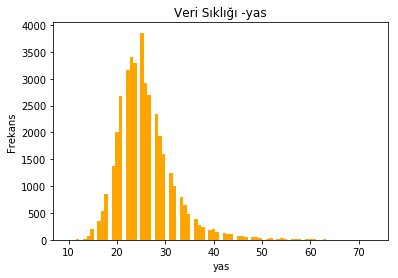

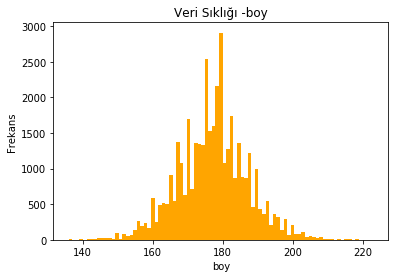

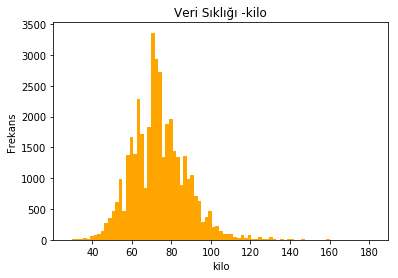

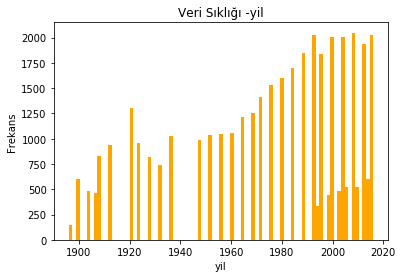

In [20]:
# tüm sayısallar için histogram çizdirelim
sayisal_degisken =["yas","boy","kilo","yil"]

for i in sayisal_degisken:
    plotHistogram(i)

In [21]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


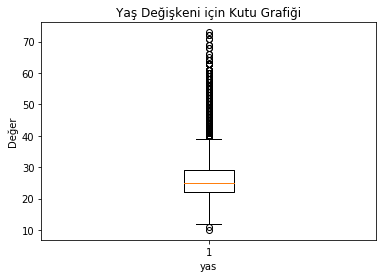

In [22]:
plt.boxplot(veri.yas)
plt.title("Yaş Değişkeni için Kutu Grafiği")
plt.xlabel("yas")
plt.ylabel("Değer")
plt.show()

Kategorik Veriler

In [23]:
#cubuk grafiği çizdirebileceğimiz metod yazalım 
def plotBar( degisken ,n= 5) : #n= 5 en çok geçen  5  essiz değeri
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index,veri_sayma,color="blue")
    plt.xticks(veri_sayma.index,veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: ¨\n {}".format(degisken,veri_sayma))

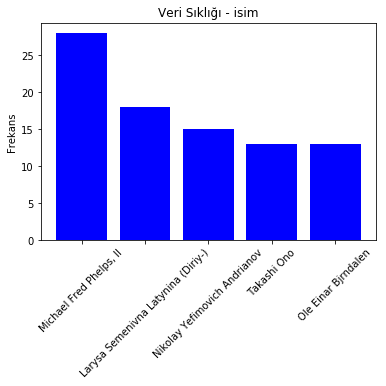

isim: ¨
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Takashi Ono                           13
Ole Einar Bjrndalen                   13
Name: isim, dtype: int64


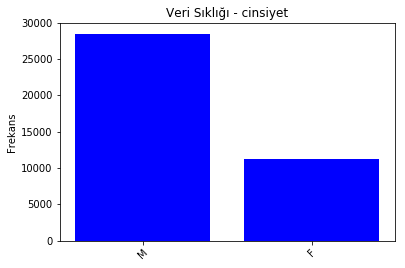

cinsiyet: ¨
 M    28530
F    11253
Name: cinsiyet, dtype: int64


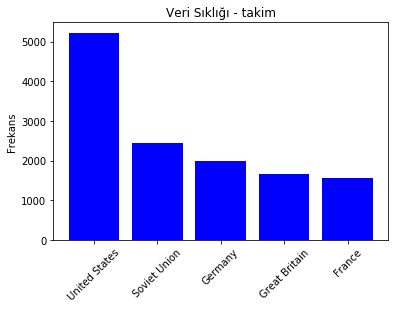

takim: ¨
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


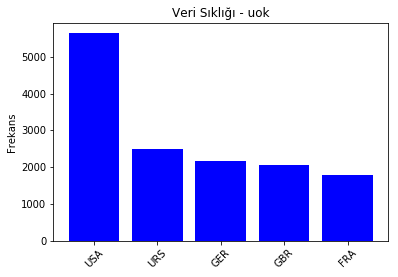

uok: ¨
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


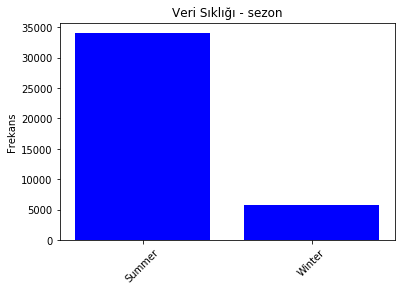

sezon: ¨
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


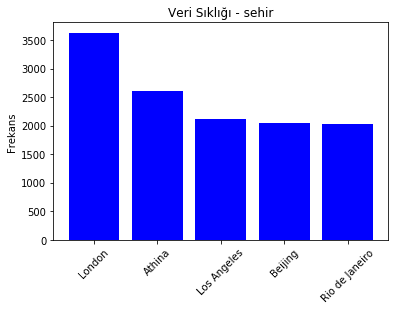

sehir: ¨
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


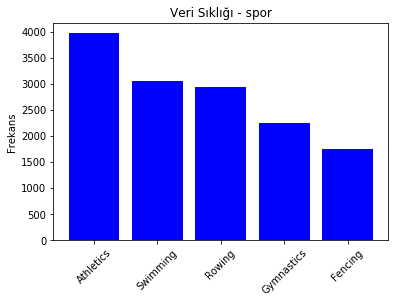

spor: ¨
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


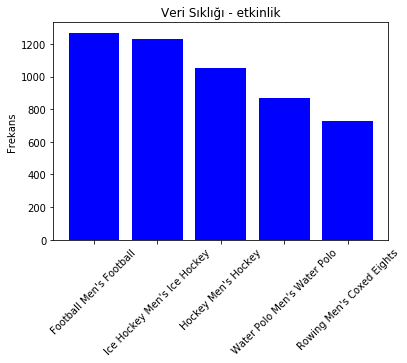

etkinlik: ¨
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


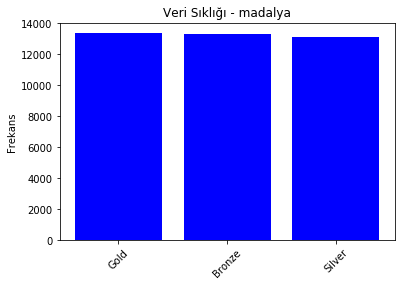

madalya: ¨
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [24]:
kategorik_degisken =["isim","cinsiyet","takim","uok","sezon","sehir","spor","etkinlik","madalya"]
for i in kategorik_degisken:
    plotBar(i)

İki değişkenli Veri Analizi

In [25]:
#Cinsiyete göre Boy ve kilo karşılaşrılması 

erkek  = veri[veri.cinsiyet =="M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [26]:
kadin = veri[veri.cinsiyet =="F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


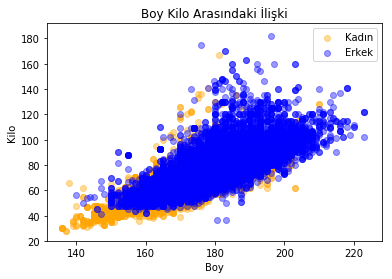

In [27]:
plt.figure()
plt.scatter(kadin.boy,kadin.kilo,alpha = 0.4 ,label ="Kadın",color = "orange")
plt.scatter(erkek.boy,erkek.kilo,alpha = 0.4 ,label ="Erkek" ,color ="blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy Kilo Arasındaki İlişki")
plt.legend()
plt.show()

Sayısal Sütünlar Arasındaki İlişki İncelemesi

In [28]:
veri.loc[:,["yas","boy","kilo"]].corr() #korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


Madalya Ve Yaş Arasındaki İlişki

In [29]:
# sporculara madalyaya göre ayıralım

veri_gecici = veri.copy()
veri_gecici= pd.get_dummies(veri_gecici,columns =['madalya'])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [30]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [31]:
# Takımların Kazandıkları Madalya Sayıları 
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"],as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


In [32]:
#Kazanılan Madalyanın hangi sehirde kazanıldığı
# Takımların Kazandıkları Madalya Sayıları 
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"],as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


In [33]:
#Cinsiyete göre kazanılan madalya
# Takımların Kazandıkları Madalya Sayıları 
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"],as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


# Çok Değişkenli Veri Analiz

In [34]:
#pivot tablosu : daha geniş tabloyu özetleyen istatislik bir tablodur
veri_pivot =veri.pivot_table(index ="madalya",columns ="cinsiyet",
                            values =["boy","kilo","yas"],
                            aggfunc ={"boy":np.mean ,"kilo":np.mean,"yas": [min,max,np.std]})

veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

# Anomali Tespiti

In [35]:
#Aykırı değer  :diğer gözlemlerden önemli ölçüde farklı olan
def anomaliTespiti(df,ozellik):
    outlier_indices =[]
    for c in ozellik:
        #1.çeyrek
        Q1 = np.percentile(df[c],25)
        #3.ceyrek
        Q3 = np.percentile(df[c],75)
        #IQR = Inter Quartile Range 
        IQR = Q3-Q1
        #aykırı değer için ek adım miktarı
        outlier_step = 1.5 *IQR
        #aykırı değeri ve de bulunduğu indeksi tespit edelim
        outlier_list_col = df[(df[c] < Q1 -outlier_step) | (df[c] >Q3 +outlier_step)].index
        # tespit edilen indisleri depolayalım 
        outlier_indices.extend(outlier_list_col)
        
        
        # essiz aykırı değerleri bulalım 
    outlier_indices =Counter(outlier_indices)
    #eğer bir  örnek v adet sütünda farklı değer ise bunu aykırı  kabul et 
    multiple_outliers = list (i for i,v in outlier_indices.items()if v>1)
    
    return  multiple_outliers

In [36]:
veri_anomali = veri.loc[anomaliTespiti(veri,["yas","boy","kilo"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Wrestling          1
Figure Skating     1
Shooting           1
Name: spor, dtype: int64

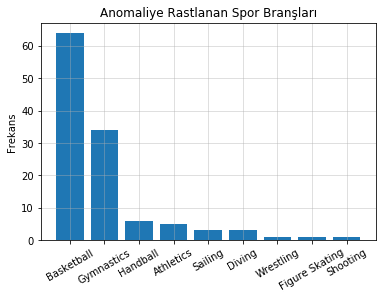

In [37]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation =30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True ,alpha =0.5)
plt.show()

In [38]:
veri_gym= veri_anomali[veri_anomali.spor=="Gymnastics" ]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
123021,Anastasiya Nikolayevna Kolesnikova,F,16.0,147.0,34.0,Russia,RUS,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Silver
217446,Shang Chunsong,F,20.0,143.0,34.0,China,CHN,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Team All-Around,Bronze
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
163298,Patricia Moreno Snchez,F,16.0,143.0,31.0,Spain,ESP,2004,Summer,Athina,Gymnastics,Gymnastics Women's Floor Exercise,Bronze
160920,Dominique Helena Moceanu (-Canales),F,14.0,139.0,34.0,United States,USA,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Team All-Around,Gold
144630,Oksana Vasilyevna Lyapina,F,16.0,144.0,33.0,Russia,RUS,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Team All-Around,Silver
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
108408,Jiang Yuyuan,F,16.0,140.0,32.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [39]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Horse Vault               1
Gymnastics Women's Individual All-Around     1
Name: etkinlik, dtype: int64

In [40]:
veri_basketbol=veri_anomali[veri_anomali.spor=="Basketball" ]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
114703,Aleksandr Olegovich Kaun,M,27.0,211.0,113.0,Russia,RUS,2012,Summer,London,Basketball,Basketball Men's Basketball,Bronze
176175,Hakeem Abdul Olajuwon,M,33.0,213.0,113.0,United States,USA,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Gold
82013,Romn Javier Gonzlez,M,30.0,210.0,140.0,Argentina,ARG,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,Bronze
270741,Eurelijus ukauskas,M,27.0,218.0,115.0,Lithuania,LTU,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Bronze
229531,Vladimir timac,M,28.0,211.0,112.0,Serbia,SRB,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Silver
142944,Kevin Wesley Love,M,23.0,208.0,118.0,United States,USA,2012,Summer,London,Basketball,Basketball Men's Basketball,Gold
120874,"Joseph William ""Joe"" Kleine",M,22.0,211.0,122.0,United States,USA,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
45521,DeMarcus Amir Cousins,M,25.0,210.0,122.0,United States,USA,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
62000,Gintaras Einikis,M,22.0,208.0,120.0,Lithuania,LTU,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze
62001,Gintaras Einikis,M,26.0,208.0,120.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [41]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

# Zaman Serilerinde Veri Analizi

In [42]:

veri_zaman=veri.copy()
veri_zaman 

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
50,Paavo Johannes Aaltonen,M,32.0,175.00,64.00,Finland,FIN,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
60,Kjetil Andr Aamodt,M,20.0,176.00,85.00,Norway,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


In [43]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [44]:
#yılları sıralayalım
sirali_yillar =np.sort(veri_zaman.yil.unique())
sirali_yillar

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

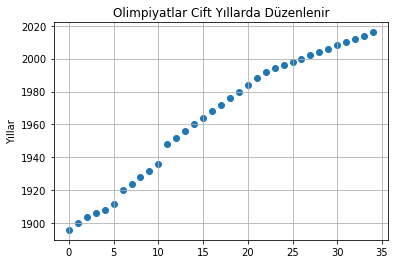

In [45]:
plt.figure()
plt.scatter(range(len(sirali_yillar)), sirali_yillar)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Cift Yıllarda Düzenlenir")
plt.show()

In [46]:
# veri içindeki yıl değerlerini datetime veri tipine dönüştürelim
tarih_saat_nesnesi=pd.to_datetime(veri_zaman["yil"],format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [47]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi  # sütün ekledik
veri_zaman.head(3) 

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [48]:
# veri_zaman değişkeninin ana indeksini ,datetime tipi olan tarih_saat değer  yapalım 
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis =1 ,inplace = True)
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
1952-01-01,Paavo Johannes Aaltonen,M,32.0,175.00,64.00,Finland,FIN,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


Yıllara göre ort yas , boy , kilo değişimi


In [49]:
periyodik_veri=veri_zaman.resample("2A").mean() # 2 yıılık periyotlar halinde ort değerleri alıyor
periyodik_veri  
# nan lar yapılmayan yıllar

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107
1910-12-31,NaN,NaN,NaN
1912-12-31,27.491945,176.890244,74.321467


In [50]:
#kayıp verileri çıkaralım
periyodik_veri.dropna(axis =0 , inplace=True)
periyodik_veri  # nan olanları çıkardım 

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107
1912-12-31,27.491945,176.890244,74.321467
1920-12-31,29.261315,176.333012,73.246437
1924-12-31,27.993929,176.658212,74.427058
1928-12-31,26.279320,175.687934,72.530049


<Figure size 432x288 with 0 Axes>

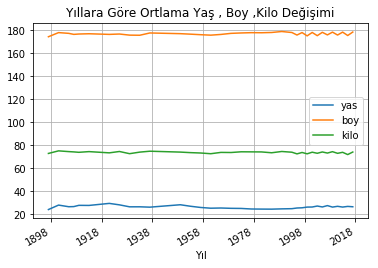

In [51]:
#yıllara göre ort yas...
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara Göre Ortlama Yaş , Boy ,Kilo Değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

Yıllara Göre Madalya Sayıları 

In [52]:
veri_zaman = pd.get_dummies(veri_zaman,columns =["madalya"])
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [53]:
periyodik_veri=veri_zaman.resample("2A").sum()
periyodik_veri.head()
#kayıp veriyi çıkaralım
periyodik_veri =periyodik_veri[~(periyodik_veri ==0).any(axis =1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

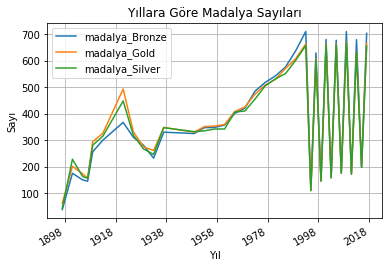

In [57]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

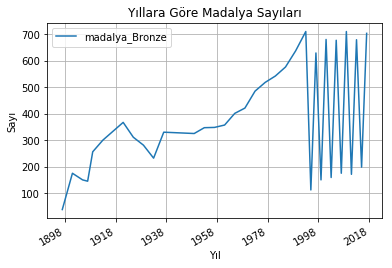

In [58]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

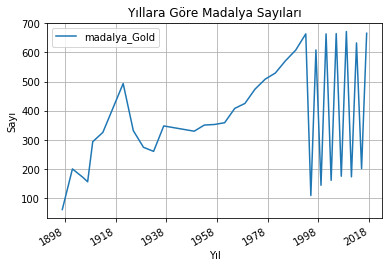

In [59]:
plt.figure()
periyodik_veri.loc[:,["madalya_Gold"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

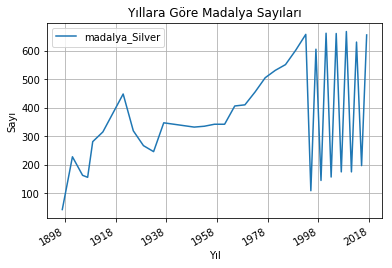

In [69]:
plt.figure()
periyodik_veri.loc[:,["madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

Yıllara Ve Sezonlara Göre Ayırma 

In [71]:
yaz = veri_zaman[veri_zaman.sezon=="Summer"]
kis=  veri_zaman[veri_zaman.sezon=="Winter"]
kis.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0
1994-01-01,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,0,0,1
1994-01-01,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,1,0,0


In [73]:
periyodik_veri_kis = kis.resample("A").sum()
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis==0).any(axis =1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [74]:
periyodik_veri_yaz = yaz.resample("A").sum()
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz==0).any(axis =1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

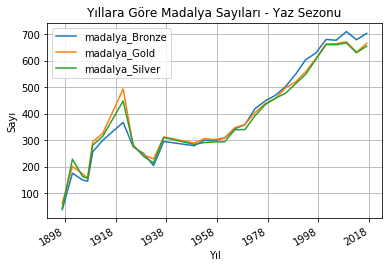

In [76]:
#yaz sezonu yıllara göre madalya sayıları 
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.xlabel("Yıl")
plt.ylabel("Sayı")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

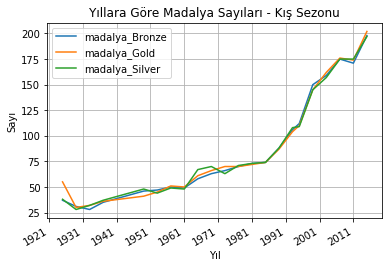

In [77]:
plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Kış Sezonu")
plt.xlabel("Yıl")
plt.ylabel("Sayı")
plt.grid(True)
plt.show()